# HW08: Spectral Clustering
## Hamza Dehidi KU 0077989
### December 28, 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa

## Importing Data

In [2]:
# read data into memory
X = np.genfromtxt("hw08_data_set.csv", delimiter = ",")

In [3]:
# sample size
N = X.shape[0]
# cluster count
K = 5

## Plotting the initial data

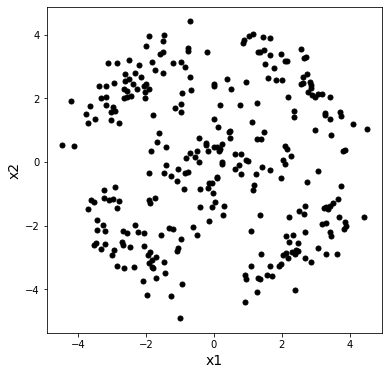

In [4]:
plt.figure(figsize = (6,6))
plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
plt.xlabel("x1",fontsize = 14)
plt.ylabel("x2",fontsize = 14);

### Calculate B matrix

$b_{ij}=   \left\{
\begin{array}{ll}
      1, & \text{$\left\|x_{i} - x_{j}\right\|_{2}$ < 𝛿} \\
      0, & \text{otherwise} \\
      \end{array} 
\right.$

$b_{ii}=0 \hspace{0.5cm} \forall{i}$

In [5]:
#Initialing the B matrix & the threshold
B = np.empty((N, N))
𝛿 = 1.25

#Calculating the all pair-wise euclidean distances
#if the distance is less than the threshold (𝛿) the value will be 1, otherwise 0
B = np.where(spa.distance_matrix(X,X)<𝛿,1,0)

#Change all B matrix diagonal values to 0
np.fill_diagonal(B, 0)

In [6]:
#Verifying B matrix
B;

### Visualizing the connections

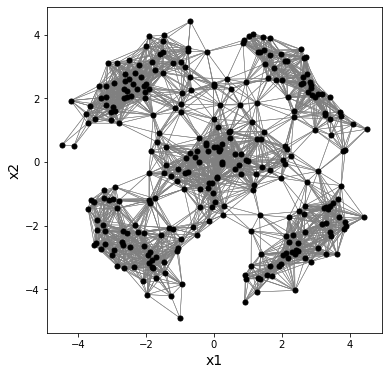

In [7]:
plt.figure(figsize = (6,6))

# i (the row index), j (the column index) where the value is 1
# if B[2,5] = 1, this means X[2] & X[5] are connected
# X[2][0] (the coordinate in x1 dimension),X[2][1] (the coordinate in x2 dimension)
for i,j in (np.argwhere(B == 1)):
    x1_values = [X[i][0], X[j][0]]
    x2_values = [X[i][1], X[j][1]]
    plt.plot(x1_values, x2_values, "-",linewidth = 0.5 , color = "gray");

plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
plt.xlabel("x1",fontsize = 14)
plt.ylabel("x2",fontsize = 14);

In [24]:
np.argwhere(B == 1)

array([[  0,   6],
       [  0,   9],
       [  0,  12],
       ...,
       [299, 283],
       [299, 292],
       [299, 296]], dtype=int64)

In [25]:
B

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Calculate D, L & L 𝑠𝑦𝑚𝑚𝑒𝑡𝑟𝑖𝑐 matrices

$d_{ii}= \sum_{i}^{N} b_{ij} \hspace{0.5cm} \forall{i}$

$d_{ij}=0 \hspace{1.5cm} \forall{(i,i\neq j)}$

In [8]:
#Initialing the D matrix (300,300)
D = np.zeros((N, N))

#getting the the rows & columns indices
row_ind,col_ind = np.diag_indices_from(B)

#filling D matrix diagonal with the sum of each corresponding row
D[row_ind,col_ind] = B.sum(axis=1)

In [9]:
D;

### Calculating the L matrix

$L= D - B$

In [10]:
L = D - B

### Calculating the L𝑠𝑦𝑚𝑚𝑒𝑡𝑟𝑖𝑐 matrix

$L_{symmetric}= I - D^{-0.5}BD^{-0.5}$

In [11]:
L_symm = np.eye(N)-(np.linalg.inv(D**0.5))@B@(np.linalg.inv(D**0.5))

In [12]:
L_symm[0];

### Calculate the eigensvalues & eigensvectors of L 𝑠𝑦𝑚𝑚𝑒𝑡𝑟𝑖𝑐 matrix

In [13]:
eigenvalues,eigenvectors = np.linalg.eig(L_symm)

# to get only the real part of eigensvalues & eigensvectors
eigenvalues == np.real(eigenvalues)
eigenvectors == np.real(eigenvectors);

In [14]:
eigenvalues.argsort();

In [15]:
smallest_eigval_inds = eigenvalues.argsort()[1:6]

In [16]:
smallest_eigval_inds;

### Calculating the Z matrix

$ Z= [v_{1} \hspace{0.5cm} v_{2} \hspace{0.5cm} ............... \hspace{0.5cm} v_{R}]$

$\hspace{1cm}\overset{\uparrow}{1st}{\hspace{0.1cm} smallest\hspace{0.1cm} eigenvector}$
$\hspace{0.9cm}\overset{\uparrow}{Rth}{\hspace{0.1cm} smallest\hspace{0.1cm} eigenvector}$

In [17]:
Z = eigenvectors[:,smallest_eigval_inds]

### k-means clustering algorithm

In [18]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = np.array((Z[28],Z[142],Z[203],Z[270],Z[276]))
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

### Visualization

In [19]:
def plot_current_state(centroids,memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    plt.figure(figsize = (6, 6))
    for c in range(K):
        plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,color = cluster_colors[c])
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12,markerfacecolor = cluster_colors[c], markeredgecolor = "black")

    plt.xlabel("x1")
    plt.ylabel("x2")

### Iterations

In [20]:
centroids = None
memberships = None
iteration = 1

while True:    
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break
        
    iteration = iteration + 1

Iteration#1:
Iteration#2:
Iteration#3:
Iteration#4:


### Calculating the final centroids in x1& x2 dimensions

In [21]:
X_dim_centroids = update_centroids(memberships, X)

In [22]:
X_dim_centroids;

### Drawing the clustering result obtained by your spectral clustering algorithm

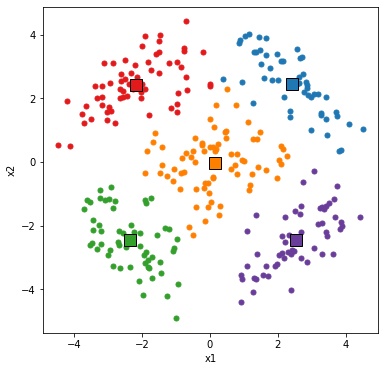

In [23]:
plot_current_state(X_dim_centroids,memberships, X)
plt.show()